# Principal Component Analysis of wine characteristics related to quality

The aim of this notebook is to explore which characteristics of wines are associated with the greatest amount of variance- and how they relate to wine quality.

## Contents

1. Scree Plot
2. Bi-plot
3. Bi-plot also including wine quality


# 1. Scree Plot

A scree plot is a line plot of the eigenvalues of factors or principal components in an analysis. The scree plot is used to determine the number of factors to retain in an exploratory factor analysis or principal components to keep in a principal component analysis [https://en.wikipedia.org/wiki/Scree_plot]

Here we look at what proportion of variance can be explained using the Principal Components of the wine dataset.

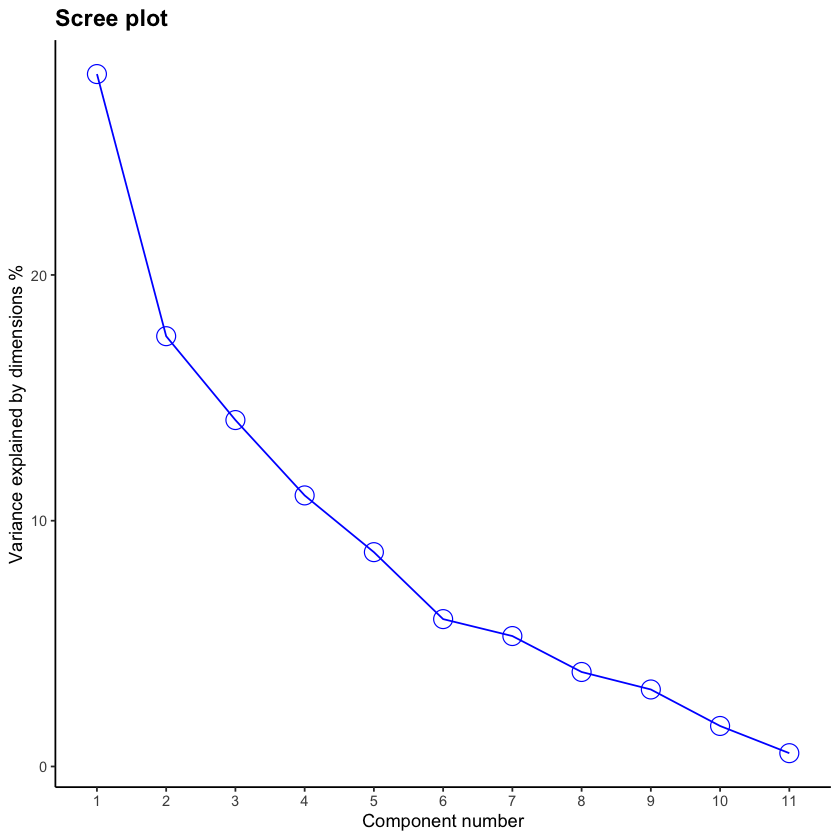

In [6]:
ggplot() +
geom_line(aes(x= 1:11, y= chem_quals.pct),
         stat= "identity",
         colour = "blue") +
geom_point(aes(x= 1:11, y= chem_quals.pct),
         colour = "blue",
         size = 5,
         shape = 1) +
theme_classic() +
ylab("Variance explained by dimensions %") +
ggtitle("Scree plot") +
scale_x_discrete(name ="Component number",
                 limits = c("1","2","3", "4", "5", "6", "7", "8", "9", "10", "11"))  +
theme(plot.title = element_text(color="black", size=14, face="bold")) 


# 2.  Bi-plot

Here we plot all of the wines as individual blue data points on the axes of the 2 largest principal components. The proportion of variance explained by each axis is indicated in the brackets in each axis label. The vectors associated with each of the individual characteristics have been overlayed in red to allow us to observe which individual characteristics are related to the largest principal components.

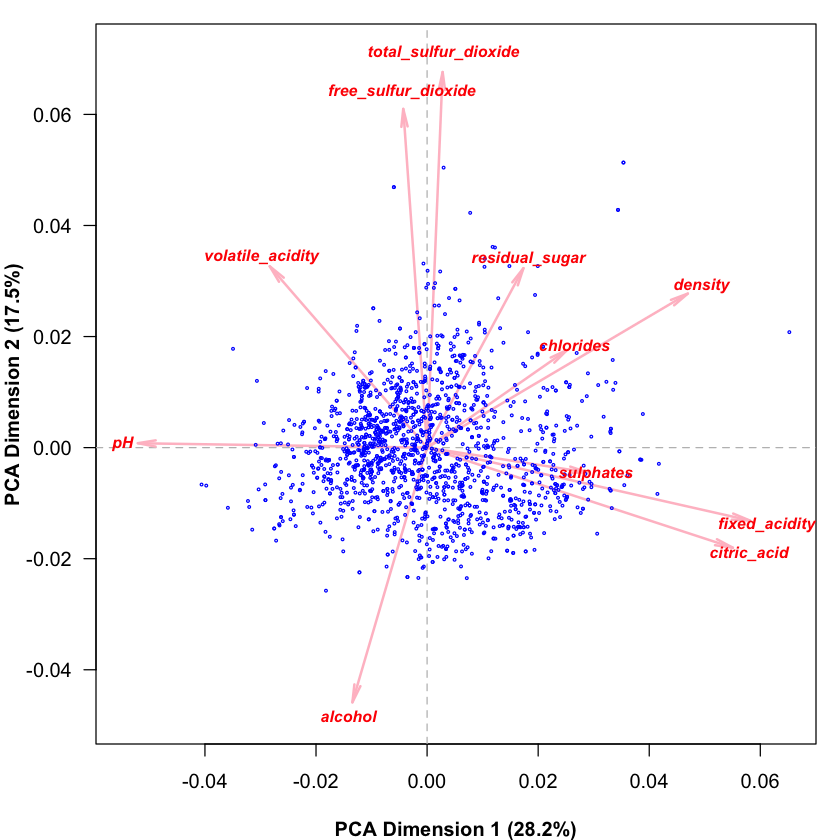

In [7]:
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.125

plot(rbind(chem_quals.rpc,rescale*chem_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(chem_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(chem_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)

arrows(0, 0, 0.95*rescale*chem_quals.csc[,1], 0.95*rescale*chem_quals.csc[,2], 
       length=0.15, angle=10, col="pink", lwd=2)

points(chem_quals.rpc,  col="blue", font=1, cex=0.3)

text(rescale*chem_quals.csc, labels=colnames(chem_quals), col="red", font=4, cex=0.8)

## Comments: Interpretation of the bi-plot

- Here we see that pH is nearly perfectly aligned with the axis of greatest variance. Perhaps we can also speculate that fixed acid and citric acid are pointing in nearly the exact opposite direction, but along the same axis, as pH, which makes sense intuitively (as high acidity means a low pH.)
- Along the second axis with the greatest variance, we see total sulfur dioxide and free sulfur dioxide closely aligned, implying that these 2 variables are closely related within our sample.
- Interestingly, alcohol and residual sugars are pointing in opposite directions. Alcohol is created in wine by the conversion of sugar! Again, this might imply that as the sugar gets used up, the alcohol level increases!
- Density, chlorides, volatile acidity and suplphates are likely to contribute less strongly, in other dimensions with lower variance,  relative to the overall variance in the sample. 

# 3. Bi-plot also including quality

Here we add labels or hulls to the wines associated with higher wine quality (note that the quality variable was not included during the Principal Component Analysis for this to work!)

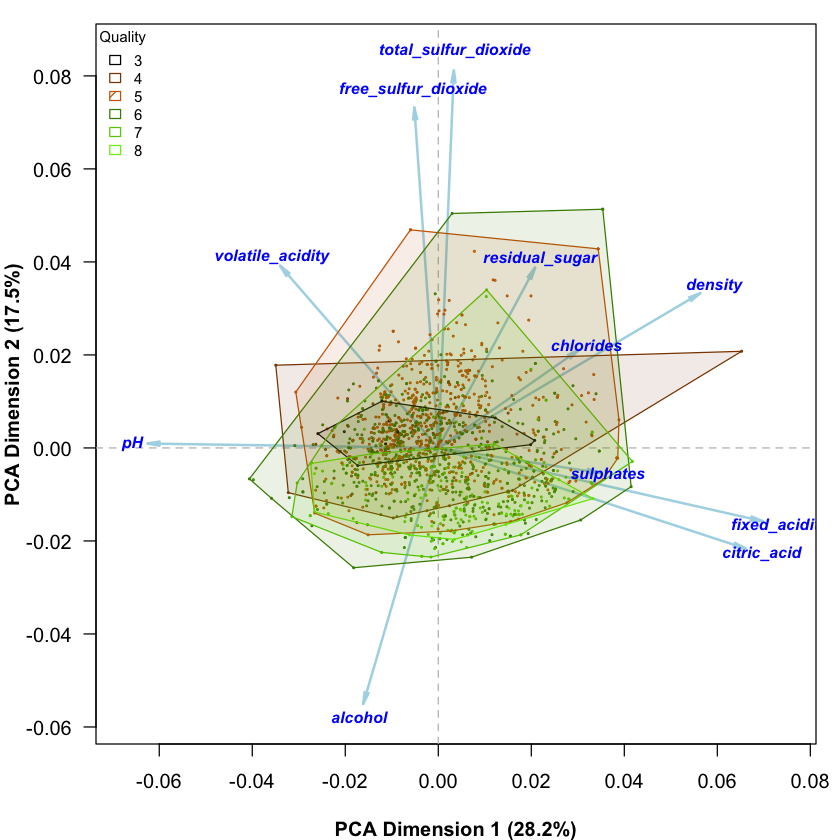

In [94]:
###  plot the two sets of coordinates 
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.15

plot(rbind(chem_quals.rpc,rescale*chem_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(chem_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(chem_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)


arrows(0, 0, 0.95*rescale*chem_quals.csc[,1], 0.95*rescale*chem_quals.csc[,2], 
       length=0.1, angle=10, col="light blue", lwd=2)


col.quals <- c("black","darkorange4", "darkorange3", "chartreuse4", "chartreuse3","chartreuse2", "chartreuse1")

points(chem_quals.rpc,  col=col.quals[quality-2], font=1, cex=0.2)

### convex hulls around groups of same quality
for(g in 3:8) {
  coords <- chem_quals.rpc[quality == g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  lines(coords[hpts,], col=col.quals[g-2])
}  

### shading in convex hulls 
for(g in 3:8) {
  coords <- chem_quals.rpc[quality==g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  polygon(coords[hpts,], col=adjustcolor(col.quals[g-2], alpha.f=0.1), border=NA)
}

text(rescale*chem_quals.csc, labels=colnames(chem_quals), col="blue", font=4, cex=0.8)

op <- par(cex = 0.75)
legend("topleft", legend=c("3", "4", "5", "6", "7", "8"), border = col.quals, fill=col.quals,
           density=0.5, bty="n", title= "Quality") 

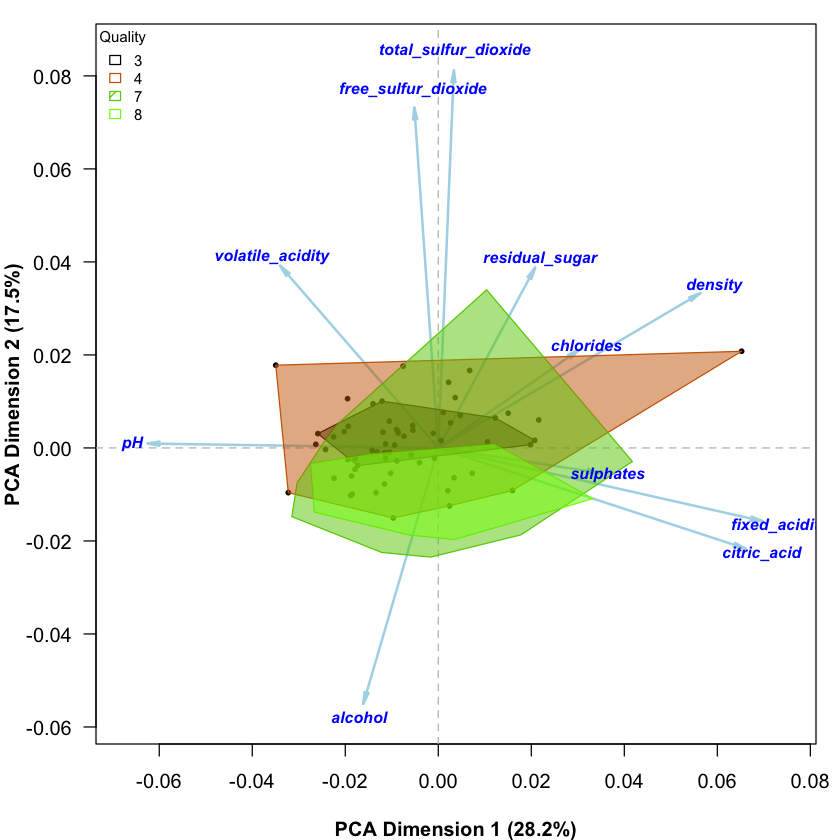

In [90]:
###  plot the two sets of coordinates 
par(mar=c(4,4,1,1), font.lab=2, las=1)
rescale=0.15

plot(rbind(chem_quals.rpc,rescale*chem_quals.csc), type="n", asp=1,
     xlab=paste("PCA Dimension 1 (",round(chem_quals.pct[1],1),"%)", sep=""),
     ylab=paste("PCA Dimension 2 (",round(chem_quals.pct[2],1),"%)", sep=""))

abline(h=0, v=0, col="gray", lty=2)

arrows(0, 0, 0.95*rescale*chem_quals.csc[,1], 0.95*rescale*chem_quals.csc[,2], 
       length=0.1, angle=10, col="light blue", lwd=2)

col.quals <- c("black", "darkorange3", "black", "black",  "chartreuse3", "chartreuse1")

### convex hulls around groups of same quality
for(g in list(3,4,7,8)) {
  coords <- chem_quals.rpc[quality == g,1:2]
  points(coords, col=col.quals[g], cex=0.75, lty=2, pch=20)
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  lines(coords[hpts,], col=col.quals[g-2])
}  


### shading in convex hulls 
for(g in list(3,4,7,8)) {
  coords <- chem_quals.rpc[quality==g,1:2]
  hpts <- chull(coords)
  hpts <- c(hpts, hpts[1])
  polygon(coords[hpts,], col=adjustcolor(col.quals[g-2], alpha.f=0.5), border=NA)
}


text(rescale*chem_quals.csc, labels=colnames(chem_quals), col="blue", font=4, cex=0.8)

op <- par(cex = 0.75)
col.quals <- c("black", "darkorange3", "chartreuse3", "chartreuse1")
legend("topleft", legend=c("3", "4", "7", "8"), border = col.quals, fill=col.quals,
           density=1, bty="n", title= "Quality") 

## Comments: Which variables are related to wine quality?

- Given that the first plot looks busy, I also plotted the second version, which shows only wine qualities at the extremes i.e. only wine qualities of 3,4,6,7. This plot makes it easy to see that there is very little overlap between the best (quality= 8) and the worst (quality= 3) wines, and there is increasing overlap between the second best (quality =7) and second worst (quality=4) wines. 

- Alcohol content and acidity seem to be related to wine quality.
- Sulfur content also appears to be slightly negatively correlated with good wine quality.